In [1]:
# libraries
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
# the function to generate the polynomial data 

def generate_poly_data(N, sigma):
  
   np.random.seed(100)
   x = np.random.uniform(low = -1, high = 3, size = N)
   y = [2 * i ** 2 - 3 * i + 1 for i in x] 
   noise = np.random.normal(0, sigma, N)
   y = y + noise
   return x, y

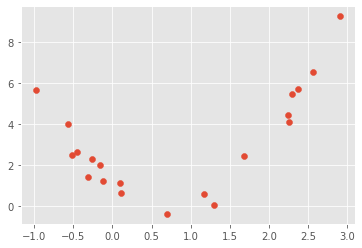

20


In [3]:
# generate data with N = 20
# we will be using the x, y as the training data for the following questions
x, y = generate_poly_data(20, 0.5)
# plot x and y
plt.scatter(x, y)
plt.show()
print(len(x))

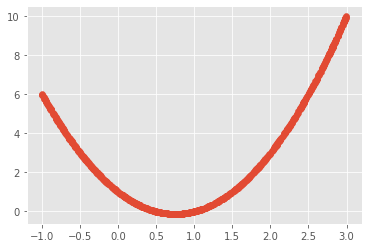

In [4]:
# Our test data 
# we can treat this test data as an approximation to the truth
# we want to make some visual comparsions as well as compute test MSEs
x_test = np.random.uniform(low = -1, high = 3, size = 1000)
y_test = np.array([2 * i ** 2 - 3 * i + 1 for i in x_test]) 
plt.scatter(x_test, y_test)
plt.show()

In [5]:
class linearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(linearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [6]:
x_dim = 1
y_dim = 1

x_test, x = x_test[:, None], x[:, None]
y_test, y = y_test[:, None], y[:, None]

n_epochs = 5000
weight_decay = 0
learning_rate = 1e-3

x_test, x = torch.tensor(x_test).float(), torch.tensor(x).float()
y_test, y = torch.tensor(y_test).float(), torch.tensor(y).float()

loss_func = nn.MSELoss()

model = linearRegression(x_dim, y_dim)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = weight_decay)

for epoch in range(n_epochs):
  optimizer.zero_grad()
  y_hat = model(x)
  loss = loss_func(y, y_hat)
  loss.backward()
  optimizer.step()

  if epoch % 500 == 0:
              print(f"Epoch {epoch} out of {n_epochs} == Loss: {loss.item()}")

Epoch 0 out of 5000 == Loss: 24.069446563720703
Epoch 500 out of 5000 == Loss: 5.298649787902832
Epoch 1000 out of 5000 == Loss: 4.628238201141357
Epoch 1500 out of 5000 == Loss: 4.448440074920654
Epoch 2000 out of 5000 == Loss: 4.3934831619262695
Epoch 2500 out of 5000 == Loss: 4.376645565032959
Epoch 3000 out of 5000 == Loss: 4.371487617492676
Epoch 3500 out of 5000 == Loss: 4.369906425476074
Epoch 4000 out of 5000 == Loss: 4.369422435760498
Epoch 4500 out of 5000 == Loss: 4.369274139404297


In [7]:
def predict(model, x):
  model.eval()
  with torch.no_grad():
    y_hat = model(x)
    return y_hat.detach().cpu().numpy()

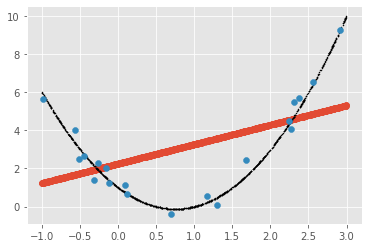

[Parameter containing:
tensor([[1.0186]], requires_grad=True), Parameter containing:
tensor([2.2506], requires_grad=True)]


In [8]:
y_hat = predict(model, x_test[:, None])
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()
print(list(model.parameters()))

#Part 2.


In [9]:
# We known the true model is an 2nd order polynomial 
'''*** Create the data for the x and x**2, fit the model, and plot as above the training data and the predictions of the test data.
Then print the parameters of your regressionLayer or your model.module.
Did you obtain something close to the true parameters?
***'''
x_dim = 1
y_dim = 1

x_test, x = x_test[:, None], x[:, None]
y_test, y = y_test[:, None], y[:, None]
c = torch.zeros(1, requires_grad=True)

n_epochs = 5000
weight_decay = 0
learning_rate = 1e-3

x_test, x = torch.tensor(x_test).float(), torch.tensor(x).float()
y_test, y = torch.tensor(y_test).float(), torch.tensor(y).float()

loss_func = nn.MSELoss()

model = linearRegression(x_dim, y_dim)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = weight_decay)

for epoch in range(n_epochs):
  optimizer.zero_grad()
  y_hat = model(x*x + x + c)
  loss = loss_func(y, y_hat)
  loss.backward()
  optimizer.step()

  if epoch % 500 == 0:
              print(f"Epoch {epoch} out of {n_epochs} == Loss: {loss.item()}")


Epoch 0 out of 5000 == Loss: 58.79972457885742
Epoch 500 out of 5000 == Loss: 3.466219663619995


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 1000 out of 5000 == Loss: 3.0168838500976562
Epoch 1500 out of 5000 == Loss: 2.8828506469726562
Epoch 2000 out of 5000 == Loss: 2.842869997024536
Epoch 2500 out of 5000 == Loss: 2.8309438228607178
Epoch 3000 out of 5000 == Loss: 2.8273863792419434
Epoch 3500 out of 5000 == Loss: 2.8263254165649414
Epoch 4000 out of 5000 == Loss: 2.8260087966918945
Epoch 4500 out of 5000 == Loss: 2.8259143829345703


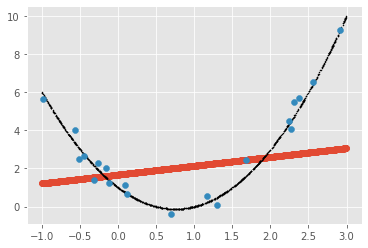

[Parameter containing:
tensor([[0.4621]], requires_grad=True), Parameter containing:
tensor([1.6762], requires_grad=True)]


In [10]:
y_hat = predict(model, x_test[:, None])
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()

print(list(model.parameters()))

# The parameters are 0.4617 and 1.6793. So quite different. The loss is definitely the least with this 2nd degree polynomial fit.

#Part 3. 

In [11]:
'''*** Create the data for a 5 degree polynomial and fit it. Should you get a better MSE than for the previous two models?.
hint: you might need to play with the learning rate until you obtain a good value
***'''

# We known the true model is an 2nd order polynomial 
'''*** Create the data for the x and x**2, fit the model, and plot as above the training data and the predictions of the test data.
Then print the parameters of your regressionLayer or your model.module.
Did you obtain something close to the true parameters?
***'''
x_dim = 1
y_dim = 1

x_test, x = x_test[:, None], x[:, None]
y_test, y = y_test[:, None], y[:, None]

n_epochs = 5000
weight_decay = 0
learning_rate = 10e-6
c = torch.zeros(1, requires_grad=True)

x_test, x = torch.tensor(x_test).float(), torch.tensor(x).float()
y_test, y = torch.tensor(y_test).float(), torch.tensor(y).float()

loss_func = nn.MSELoss()

model = linearRegression(x_dim, y_dim)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = weight_decay)

for epoch in range(n_epochs):
  optimizer.zero_grad()
  y_hat = model(x*x*x*x*x + x*x*x*x + x*x*x + x*x + x + c)
  loss = loss_func(y, y_hat)
  loss.backward()
  optimizer.step()

  if epoch % 500 == 0:
              print(f"Epoch {epoch} out of {n_epochs} == Loss: {loss.item()}")

Epoch 0 out of 5000 == Loss: 1244.9688720703125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 500 out of 5000 == Loss: 4.205975532531738
Epoch 1000 out of 5000 == Loss: 4.171388626098633
Epoch 1500 out of 5000 == Loss: 4.13730525970459
Epoch 2000 out of 5000 == Loss: 4.103716850280762
Epoch 2500 out of 5000 == Loss: 4.070616722106934
Epoch 3000 out of 5000 == Loss: 4.037998199462891
Epoch 3500 out of 5000 == Loss: 4.005854606628418
Epoch 4000 out of 5000 == Loss: 3.9741768836975098
Epoch 4500 out of 5000 == Loss: 3.9429595470428467


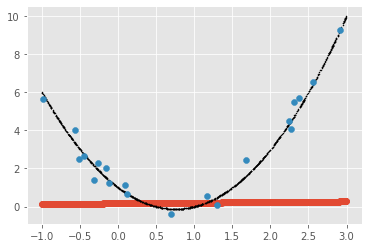

[Parameter containing:
tensor([[0.0337]], requires_grad=True), Parameter containing:
tensor([0.1676], requires_grad=True)]


In [12]:
y_hat = predict(model, x_test[:, None])
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()
print(list(model.parameters()))

# The parameters are 0.0376 and -0.5511, so again quite different. The loss is  very close to the 2nd degree polynomial. I think with 5 parameters it should be able to have a lower loss than the 2nd degree. This is because it could overfit the data. Note, I had to tune the learning rate down quite slow to avoid nan loss results. 

In [13]:
'''*** Create a for loop for different values of sigma = [0.1, 0.5, 1], and N = [15, 100]
use a 5 degree polynomial model with different values for regularization 
weight_decay = [0, 0.2, 0.5], compute the testing error 
***'''

'*** Create a for loop for different values of sigma = [0.1, 0.5, 1], and N = [15, 100]\nuse a 5 degree polynomial model with different values for regularization \nweight_decay = [0, 0.2, 0.5], compute the testing error \n***'

In [18]:
N = [15, 100]

weight_decay = [0, 0.2, 0.5]

sigma = [0.1, 0.5, 1]

n_epochs = 5000

learning_rate = 1e-6
for s in sigma:
  
  for n in N:
    x, y = generate_poly_data(n, s)
    for w in weight_decay:
      
      x_dim = 1
      y_dim = 1

      x_test, x = x_test[:, None], x[:, None]
      y_test, y = y_test[:, None], y[:, None]

      
      c = torch.zeros(1, requires_grad=True)

      x_test, x = torch.tensor(x_test).float(), torch.tensor(x).float()
      y_test, y = torch.tensor(y_test).float(), torch.tensor(y).float()

      loss_func = nn.MSELoss()

      model = linearRegression(x_dim, y_dim)

      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = w)

      for epoch in range(n_epochs):
        optimizer.zero_grad()
        y_hat = model(x*x*x*x*x + x*x*x*x + x*x*x + x*x + x + c)
        loss = loss_func(y, y_hat)
        loss.backward()
        optimizer.step()

        # if epoch % 500 == 0:
        #             print(f"Epoch {epoch} out of {n_epochs} == Loss: {loss.item()}")

      y_hat = predict(model, x[:, None])
      y_hat_tensor = torch.as_tensor(y_hat).float()
      testing_error = torch.sum(y_hat_tensor - x_test)
      print(f"testing error: {testing_error}, Noise:  {n},  weight decay:  {w}, sigma:  {s}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


testing error: -20772.859375, Noise:  15,  weight decay:  0, sigma:  0.1
testing error: -18980.724609375, Noise:  15,  weight decay:  0.2, sigma:  0.1
testing error: -24143.50390625, Noise:  15,  weight decay:  0.5, sigma:  0.1
testing error: -9206.1181640625, Noise:  100,  weight decay:  0, sigma:  0.1
testing error: -57257.203125, Noise:  100,  weight decay:  0.2, sigma:  0.1
testing error: -187507.59375, Noise:  100,  weight decay:  0.5, sigma:  0.1
testing error: -21530.22265625, Noise:  15,  weight decay:  0, sigma:  0.5
testing error: -23827.064453125, Noise:  15,  weight decay:  0.2, sigma:  0.5
testing error: -27623.6328125, Noise:  15,  weight decay:  0.5, sigma:  0.5
testing error: -114257.78125, Noise:  100,  weight decay:  0, sigma:  0.5
testing error: -99472.671875, Noise:  100,  weight decay:  0.2, sigma:  0.5
testing error: -150161.75, Noise:  100,  weight decay:  0.5, sigma:  0.5
testing error: -21524.748046875, Noise:  15,  weight decay:  0, sigma:  1
testing error: -5

# For sigma = 0.1 and noise = 15, weight decay of 0.2 performed the best
# For sigma = 0.1 and noise = 100, weight decay of 0 performed the best
#For sigma = 0.5 and noise = 15, weight decay of 0 performed the best
#For sigma = 0.5 and noise = 100, weight decay of 0.2 performed the best
#For sigma = 1 and noise = 15, weight decay of 0.2 performed the best
#For sigma = 1 and noise = 100, weight decay of 0.2 performed the best